In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import confusion_matrix
from pretty_confusion_matrix import pp_matrix

In [2]:
file_name = "Detection of COVID-19 Infection from Routine Blood Exams_dataset_reform.xlsx"
df = pd.read_excel(file_name, sheet_name="Foglio1", nrows=279, usecols="A:P")
df

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,M,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,2
1,M,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,2
2,M,72,4.6,206.0,NaN,NaN,NaN,NaN,NaN,193.7,31.0,22.0,NaN,NaN,NaN,2
3,M,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,2
4,M,77,4.9,198.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,F,40,5.6,270.0,NaN,NaN,NaN,NaN,NaN,16.7,22.0,29.0,78.0,20.0,NaN,0
275,M,26,4.7,44.0,NaN,NaN,NaN,NaN,NaN,47.5,30.0,44.0,110.0,93.0,175.0,0
276,F,44,15.7,356.0,NaN,NaN,NaN,NaN,NaN,2.4,31.0,17.0,NaN,NaN,272.0,0
277,F,41,12.0,321.0,6.7,2.3,1.6,1.3,0.1,41.2,16.0,11.0,201.0,14.0,266.0,0


In [3]:
means = [61.336917562724, 8.55306859205776, 226.532129963899, 6.20047846889952, 1.18653846153846, 0.605741626794258,
         0.0550239234449761, 0.0144230769230769, 90.889010989011, 54.202166064982, 44.9172932330827, 89.8931297709924, 
         82.4779411764706, 380.448453608247]
# for determine means as nan data
# for column, mean in zip(df.columns[1:-1], means):
#     df[column].fillna(value=mean, inplace = True)

df['SESSO'].replace(['M','F'], [0,1],inplace=True)
df['TARGET'].replace([1, 2], [1,1], inplace=True)
pure_df = df.dropna()
pure_df

,SESSO,AGE,WBC,Piastrine,Neutrofili,Linfociti,Monociti,Eosinofili,Basofili,PCR,AST,ALT,ALP,GGT,LDH,TARGET
0,0,56,2.9,128.0,1.9,0.8,0.2,0.0,0.0,29.0,36.0,18.0,43.0,21.0,257.0,1
1,0,56,3.5,151.0,2.1,0.9,0.4,0.0,0.0,16.5,25.0,14.0,50.0,17.0,207.0,1
3,0,72,16.5,316.0,14.0,1.2,0.3,0.0,0.0,318.7,96.0,33.0,80.0,42.0,651.0,1
8,0,75,11.6,123.0,10.0,0.8,0.7,0.0,0.0,244.6,53.0,37.0,43.0,27.0,439.0,1
13,0,87,8.7,93.0,6.8,1.3,0.6,0.0,0.0,201.3,36.0,28.0,73.0,63.0,375.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,36,7.7,300.0,4.5,2.2,0.8,0.2,0.0,33.1,37.0,26.0,71.0,43.0,294.0,0
267,0,59,6.8,171.0,5.7,0.7,0.5,0.0,0.0,110.2,41.0,36.0,80.0,147.0,359.0,0
270,1,81,13.0,205.0,9.4,3.0,0.5,0.0,0.1,52.1,18.0,26.0,72.0,64.0,304.0,0
273,1,30,6.8,362.0,4.5,1.9,0.4,0.0,0.0,28.1,24.0,12.0,55.0,60.0,357.0,0


In [4]:
dataset = pure_df.to_numpy()
np.random.seed(9)
train_index = np.random.rand(83) <= 0.7
test_index = np.logical_not(train_index)
train_dataset, test_dataset = dataset[train_index], dataset[test_index]


def normalize_dataset (train_dataset: np.array, test_dataset: np.array):
    min_v = train_dataset.min(axis=0)
    max_v = train_dataset.max(axis=0)
    train_dataset = (train_dataset - min_v) / (max_v - min_v)
    test_dataset = (test_dataset - min_v) / (max_v - min_v)
    return train_dataset, test_dataset

normalize_train_dataset, normalize_test_dataset = normalize_dataset(train_dataset, test_dataset)

In [5]:
def r_o(dataset: np.array):
    covid_cases = dataset[dataset[:,-1] == 1]
    no_covid_cases = dataset[dataset[:,-1] == 0]
    mean_covid = covid_cases.mean(axis=0)
    mean_no_covid = no_covid_cases.mean(axis=0)
    r_o = np.stack([mean_no_covid, mean_covid]).T
    return r_o[:-1,]

occurence_matrix = r_o(dataset=normalize_train_dataset)
occurence_matrix

array([[0.42105263, 0.28571429],
       [0.46090226, 0.56258503],
       [0.430732  , 0.24452655],
       [0.33952153, 0.24190476],
       [0.39107703, 0.27625355],
       [0.38596491, 0.1712963 ],
       [0.26140351, 0.08650794],
       [0.12145749, 0.01648352],
       [0.31578947, 0.04761905],
       [0.17503893, 0.30443083],
       [0.1264482 , 0.27972447],
       [0.10440967, 0.2018018 ],
       [0.13752563, 0.11348176],
       [0.04270349, 0.08936489],
       [0.12890923, 0.23913043]])

In [6]:
def r_c(dataset: np.array):
    X = dataset[:,:-1]
    y = dataset[:,-1]
    covid = np.sum(y==1) / len(y)
    # print(covid)
    scores = []
    for i in range(X.shape[1]):
        model = LogisticRegression(class_weight="balanced").fit(X[:,[i]], y)
        score = model.score(X[:,[i]], y)
        y_pred = model.predict(X[:,[i]])
        cfm = confusion_matrix(y_pred=y_pred, y_true=y, normalize="true")
        # print(cfm)
        scores.append([cfm[0, 0], cfm[1, 1]])
    scores = np.array(scores) 
    # scores = (scores - min([np.min(scores), covid])) 
    # scores = (scores - 0.5) 

    # scores = scores / (1.2*np.max(scores))
    # print(scores)
    # y_pred = model.predict(X[:,[-1]])
    # cfm = confusion_matrix(y_pred=y_pred, y_true=y, normalize="true")
    # # print(sum(zero)/len(zero))
    # print(cfm)
    r_c = scores
    return r_c
confirmability_matrix = r_c(dataset=train_dataset)
confirmability_matrix


array([[0.42105263, 0.71428571],
       [0.57894737, 0.54761905],
       [0.52631579, 0.71428571],
       [0.57894737, 0.73809524],
       [0.42105263, 0.66666667],
       [0.57894737, 0.80952381],
       [0.63157895, 0.78571429],
       [0.47368421, 0.88095238],
       [0.31578947, 0.95238095],
       [0.68421053, 0.5       ],
       [0.78947368, 0.5952381 ],
       [0.68421053, 0.5       ],
       [0.31578947, 0.66666667],
       [0.73684211, 0.35714286],
       [0.73684211, 0.5952381 ]])

In [15]:
def min_max(r_o, r_c, dataset):
    occurence = []
    for row in dataset:
        # print(row, r_o[:,0])
        no_covid = np.max(np.minimum(row[:-1], r_o[:,0]))
        covid = np.max(np.minimum(row[:-1], r_o[:,1]))
        occurence.append([no_covid, covid])
    confirmability = []
    for row in dataset:
        no_covid = np.max(np.minimum(row[:-1], r_c[:,0]))
        covid = np.max(np.minimum(row[:-1], r_c[:,1]))
        confirmability.append([no_covid, covid])
    predict = []
    predict2 = []
    # print(occurence)
    for i in range(len(occurence)):
        # covid = confirmability[i][1] - occurence[i][1]
        # no_covid = confirmability[i][0] - occurence[i][0]

        # if covid > no_covid:
        #     predict.append(1)
        # else:
        #     predict.append(0)
        confirm = confirmability[i][1] - confirmability[i][0]
        if abs(confirm) >= 0.30:
            predict.append(confirmability[i].index(max(confirmability[i])))
        else:
            predict.append(occurence[i].index(max(occurence[i])))
        # if confirmability[i][1] > confirmability[i][0]:
        #     predict.append(1)
        # else:
        #     predict.append(0) 
    cfm = confusion_matrix(y_pred=predict, y_true=dataset[:,-1], normalize="true")
    # print(confirmability)
    # print (occurence)
    return cfm
    
confusion = min_max(occurence_matrix, confirmability_matrix, normalize_test_dataset)
confusion

array([[0.5       , 0.5       ],
       [0.27777778, 0.72222222]])

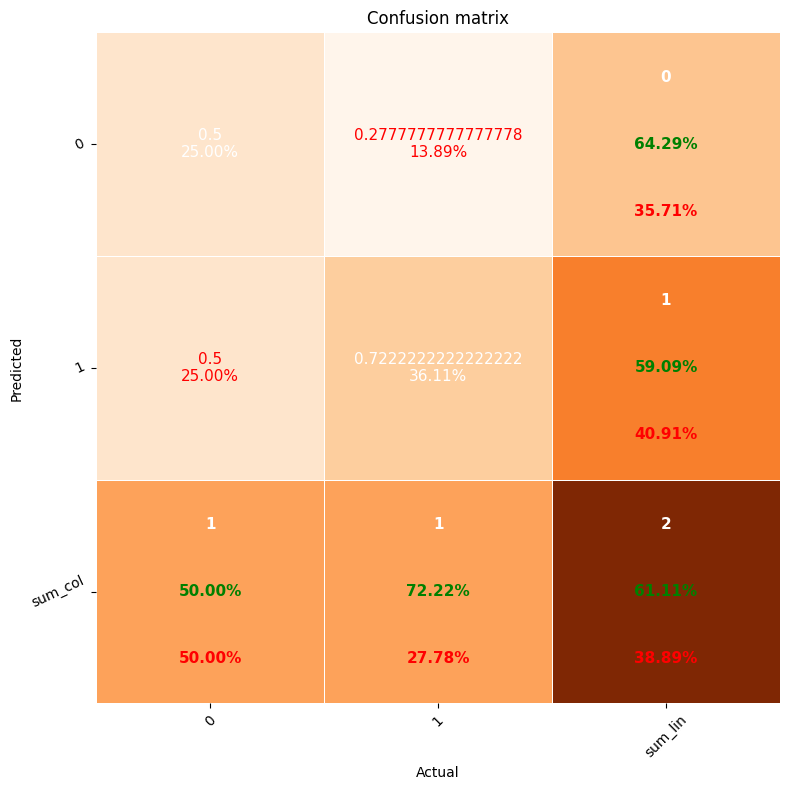

In [10]:
pp_matrix(pd.DataFrame(confusion))